### Read in the Data

In [2]:
import pandas as pd
import numpy as np

from PIL import Image
import requests
from io import BytesIO
import cv2

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('listings_summary.csv')

# checking shape
print("The dataset has {} rows and {} columns.".format(*df.shape))

# ... and duplicates
print("It contains {} duplicates.".format(df.duplicated().sum()))

The dataset has 22552 rows and 96 columns.
It contains 0 duplicates.


In [4]:
columns_for_images = ['id', 'picture_url']
images = df[columns_for_images]

### DataFrame of IDs and Picture URLs

In [5]:
print(images.shape)
images.tail(10)

(22552, 2)


,id,picture_url
22542,29851651,https://a0.muscache.com/im/pictures/a0133423-a...
22543,29853463,https://a0.muscache.com/im/pictures/8fbd721f-7...
22544,29856029,https://a0.muscache.com/im/pictures/c6a2afbd-7...
22545,29856359,https://a0.muscache.com/im/pictures/7b6aa96d-c...
22546,29856646,https://a0.muscache.com/im/pictures/2a1369ed-2...
22547,29856708,https://a0.muscache.com/im/pictures/43de229c-e...
22548,29857108,https://a0.muscache.com/im/pictures/d2b27398-b...
22549,29864272,https://a0.muscache.com/im/pictures/0e40a7c4-b...
22550,29866805,https://a0.muscache.com/im/pictures/5a110f66-e...
22551,29867352,https://a0.muscache.com/im/pictures/20da089f-2...


### Columns for the top 5 objects in the picture

In [6]:
images['object_1'] = 0
images['object_2'] = 0
images['object_3'] = 0
images['object_4'] = 0
images['object_5'] = 0

In [32]:
#step 1 - pick a image link from the dataframe
x = images['picture_url'][3]
user_id = images['id'][3]

In [33]:
#step 2 - get the image
response = requests.get(x)

In [34]:
#step 3 - download as an image
img = Image.open(BytesIO(response.content))

In [35]:
#step 4 resize the image (to be used in ResNet50)
resized_image = tf.image.resize_images(img, (224, 224))

In [36]:
#step 5 - get image into a numpy array
x = image.img_to_array(img)

In [37]:
# step 6 - fits in ResNet50
height = 224
width = 224
dim = (width, height)
res = cv2.resize(x, dim, interpolation=cv2.INTER_LINEAR)

In [24]:
def img_contents(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=5)[0]
    return results

In [38]:
#step 7
results = img_contents(res)
results

[('n04344873', 'studio_couch', 0.86098236),
 ('n03529860', 'home_theater', 0.07197527),
 ('n02870880', 'bookcase', 0.020048376),
 ('n04033995', 'quilt', 0.009242235),
 ('n03290653', 'entertainment_center', 0.00747543)]

In [26]:
objects = []
objects_dict = {}
for entry in range(5):
    objects.append(results[entry][1])
    
objects_dict = {'id': user_id,
                'object_1': objects[0],
                'object_2': objects[1],
                'object_3': objects[2],
                'object_4': objects[3],
                'object_5': objects[4]}
objects_dict

{'id': 3309,
 'object_1': 'studio_couch',
 'object_2': 'home_theater',
 'object_3': 'bookcase',
 'object_4': 'quilt',
 'object_5': 'entertainment_center'}

In [16]:
objects_df = pd.DataFrame.from_dict(objects_dict, orient='index')

In [17]:
objects_df = objects_df.transpose()
objects_df

,id,object_1,object_2,object_3,object_4,object_5
0,7071,four-poster,dining_table,window_shade,tub,studio_couch


In [27]:
objects_df2 = pd.DataFrame.from_dict(objects_dict, orient='index')

In [28]:
objects_df2 = pd.DataFrame.from_dict(objects_dict, orient='index')
objects_df2 = objects_df2.transpose()
objects_df2

,id,object_1,object_2,object_3,object_4,object_5
0,3309,studio_couch,home_theater,bookcase,quilt,entertainment_center


In [29]:
objects_df = objects_df.append(objects_df2, ignore_index=True)

In [30]:
objects_df

,id,object_1,object_2,object_3,object_4,object_5
0,7071,four-poster,dining_table,window_shade,tub,studio_couch
1,3309,studio_couch,home_theater,bookcase,quilt,entertainment_center


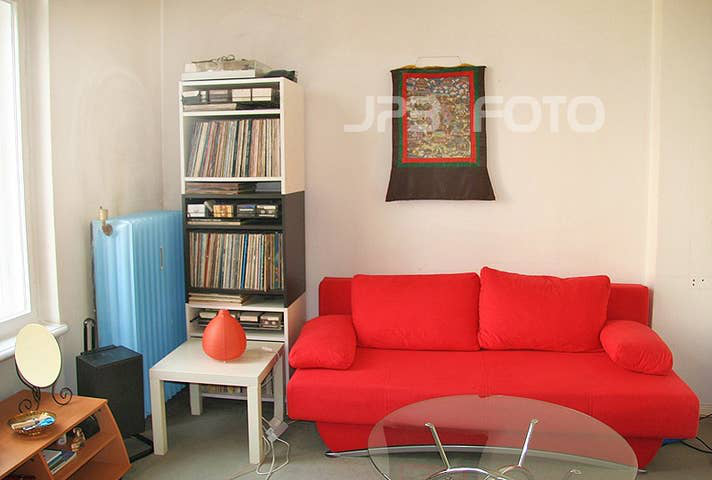

In [31]:
#step 8
img 

In [11]:
from PIL import Image
import requests
from io import BytesIO

In [116]:
# images / 20 seconds / to minutes / to hours
22000*20/60/60

122.22222222222221

In [117]:
122/24

5.083333333333333

In [63]:
img = Image.open(BytesIO(response.content)) #step 3

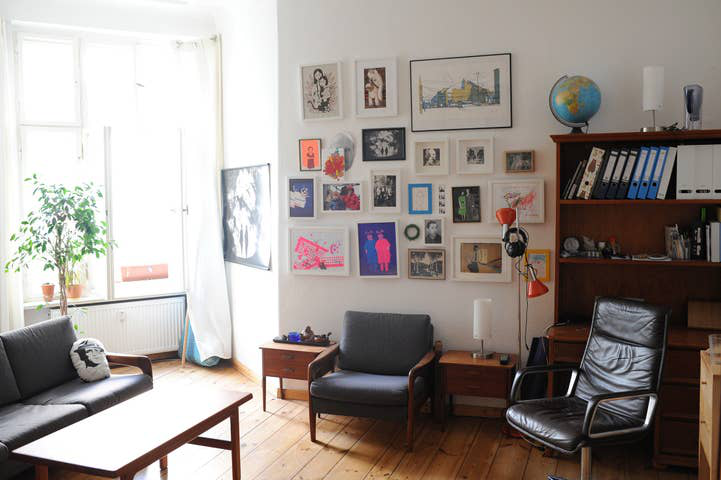

In [55]:
img

In [101]:
def img_contents(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=5)[0]
    return results

In [33]:
resized_image = tf.image.resize_images(img, (224, 224)) #step 4

In [32]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [34]:
type(resized_image)

tensorflow.python.framework.ops.Tensor

In [36]:
import cv2

In [42]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [56]:
x = image.img_to_array(img) #step 5

In [44]:
type(x)

numpy.ndarray

In [57]:
# step 6
height = 224
width = 224
dim = (width, height)
res = cv2.resize(x, dim, interpolation=cv2.INTER_LINEAR)

In [58]:
res.shape

(224, 224, 3)

In [40]:
# Preprocessing
def processing(data):
    x = image.img_to_array(data)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    height = 224
    width = 224
    dim = (width, height)
    res = cv2.resize(data, dim, interpolation=cv2.INTER_LINEAR)
    print("RESIZED", res.shape)    

In [59]:
img_contents(res) #step 7

[('n02870880', 'bookcase', 0.54546976), ('n03179701', 'desk', 0.2079393), ('n04344873', 'studio_couch', 0.060865622), ('n03290653', 'entertainment_center', 0.03482671), ('n04099969', 'rocking_chair', 0.024437819)]


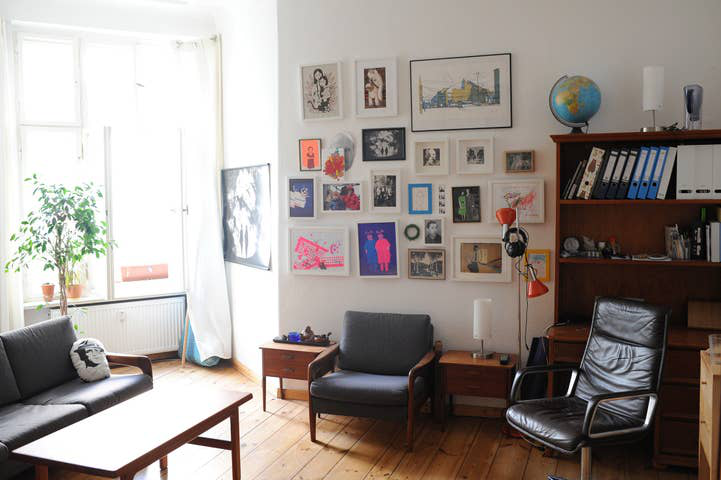

In [60]:
img #step 8